In [1]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
import seaborn as sns

from cardiac_electrophysiology.ulac import parameterization, preprocessing

In [2]:
patient_id = "01"
infile_name = f"../data/processed/patient_{patient_id}/mesh_with_fibers_tags.vtk"

vtk_mesh = pv.read(infile_name)
triangular_mesh = preprocessing.convert_unstructured_to_polydata_mesh(vtk_mesh)

In [3]:
load_file = Path("segmentation.pkl")

with load_file.open("rb") as f:
    boundary_paths, pv_markers, laa_markers, mv_markers = pickle.load(f)

In [4]:
parameterized_pv_paths = parameterization.parameterize_pv_paths_by_arc_length(
    triangular_mesh, boundary_paths, pv_markers
)
parameterized_laa_path = parameterization.parameterize_laa_path_by_arc_length(
    triangular_mesh, boundary_paths, laa_markers
)
parameterized_mv_path = parameterization.parameterize_mv_path_by_arc_length(
    triangular_mesh, boundary_paths, mv_markers
)

In [5]:
alpha_min = 0
alpha_max = 1
beta_min = 0
beta_max = 1

alpha_ripv_center = 1 / 3 * (alpha_max - alpha_min) + alpha_min
alpha_rspv_center = alpha_ripv_center
alpha_lipv_center = 2 / 3 * (alpha_max - alpha_min) + alpha_min
alpha_lspv_center = alpha_lipv_center

beta_ripv_center = 2 / 3 * (beta_max - beta_min) + beta_min
beta_rspv_center = 1 / 3 * (beta_max - beta_min) + beta_min
beta_lipv_center = beta_ripv_center
beta_lspv_center = beta_rspv_center

alpha_laa_center = 5 / 6 * (alpha_max - alpha_min) + alpha_min
beta_laa_center = 5 / 6 * (beta_max - beta_min) + beta_min

radius_pv_inner = 0.05
radius_pv_outer = 0.025
radius_laa = 0.05

In [6]:
def alpha_circular(x, center, radius, start_angle):
    angle = start_angle + 2 * np.pi * x
    alpha = center + radius * np.cos(angle)
    return alpha


def beta_circular(x, center, radius, start_angle):
    angle = start_angle + 2 * np.pi * x
    beta = center + radius * np.sin(angle)
    return beta

def alpha_mv(x):
    alpha = np.zeros(x.size)
    first_edge = np.where(x <= 0.25)[0]
    second_edge = np.where((x > 0.25) & (x < 0.5))[0]
    third_edge = np.where((x >= 0.5) & (x < 0.75))[0]
    fourth_edge = np.where(x >= 0.75)[0]
    alpha[first_edge] = 4 * x[first_edge]
    alpha[second_edge] = 1
    alpha[third_edge] = 4 * (0.75 - x[third_edge])
    alpha[fourth_edge] = 0
    return alpha

def beta_mv(x):
    beta = np.zeros(x.size)
    first_edge = np.where(x < 0.25)[0]
    second_edge = np.where((x >= 0.25) & (x < 0.5))[0]
    third_edge = np.where((x >= 0.5) & (x < 0.75))[0]
    fourth_edge = np.where(x >= 0.75)[0]
    beta[first_edge] = 0
    beta[second_edge] = 4 * (x[second_edge] - 0.25)
    beta[third_edge] = 1
    beta[fourth_edge] = 4 * (1 - x[fourth_edge])
    return beta

In [7]:
alpha_ripv_inner = alpha_circular(
    parameterized_pv_paths.RIPV_inner.values, alpha_ripv_center, radius_pv_inner, 3 / 2 * np.pi
)
alpha_ripv_outer = alpha_circular(
    parameterized_pv_paths.RIPV_outer.values, alpha_ripv_center, radius_pv_outer, 3 / 2 * np.pi
)
alpha_rspv_inner = alpha_circular(
    parameterized_pv_paths.RSPV_inner.values, alpha_rspv_center, radius_pv_inner, 0 * np.pi
)
alpha_rspv_outer = alpha_circular(
    parameterized_pv_paths.RSPV_outer.values, alpha_rspv_center, radius_pv_outer, 0 * np.pi
)
alpha_lipv_inner = alpha_circular(
    parameterized_pv_paths.LIPV_inner.values, alpha_lipv_center, radius_pv_inner, 1 * np.pi
)
alpha_lipv_outer = alpha_circular(
    parameterized_pv_paths.LIPV_outer.values, alpha_lipv_center, radius_pv_outer, 1 * np.pi
)
alpha_lspv_inner = alpha_circular(
    parameterized_pv_paths.LSPV_inner.values, alpha_lspv_center, radius_pv_inner, 1 / 2 * np.pi
)
alpha_lspv_outer = alpha_circular(
    parameterized_pv_paths.LSPV_outer.values, alpha_lspv_center, radius_pv_outer, 1 / 2 * np.pi
)

beta_ripv_inner = beta_circular(
    parameterized_pv_paths.RIPV_inner.values, beta_ripv_center, radius_pv_inner, 3 / 2 * np.pi
)
beta_ripv_outer = beta_circular(
    parameterized_pv_paths.RIPV_outer.values, beta_ripv_center, radius_pv_outer, 3 / 2 * np.pi
)
beta_rspv_inner = beta_circular(
    parameterized_pv_paths.RSPV_inner.values, beta_rspv_center, radius_pv_inner, 0 * np.pi
)
beta_rspv_outer = beta_circular(
    parameterized_pv_paths.RSPV_outer.values, beta_rspv_center, radius_pv_outer, 0 * np.pi
)
beta_lipv_inner = beta_circular(
    parameterized_pv_paths.LIPV_inner.values, beta_lipv_center, radius_pv_inner, 1 * np.pi
)
beta_lipv_outer = beta_circular(
    parameterized_pv_paths.LIPV_outer.values, beta_lipv_center, radius_pv_outer, 1 * np.pi
)
beta_lspv_inner = beta_circular(
    parameterized_pv_paths.LSPV_inner.values, beta_lspv_center, radius_pv_inner, 1 / 2 * np.pi
)
beta_lspv_outer = beta_circular(
    parameterized_pv_paths.LSPV_outer.values, beta_lspv_center, radius_pv_outer, 1 / 2 * np.pi
)

alpha_laa = alpha_circular(
    parameterized_laa_path.values, alpha_laa_center, radius_laa, 1 / 3 * np.pi
)
beta_laa = beta_circular(
    parameterized_laa_path.values, beta_laa_center, radius_laa, 1 / 3 * np.pi
)

alpha_mv = alpha_mv(parameterized_mv_path.values)
beta_mv = beta_mv(parameterized_mv_path.values)

Text(0, 0.5, '$\\beta$')

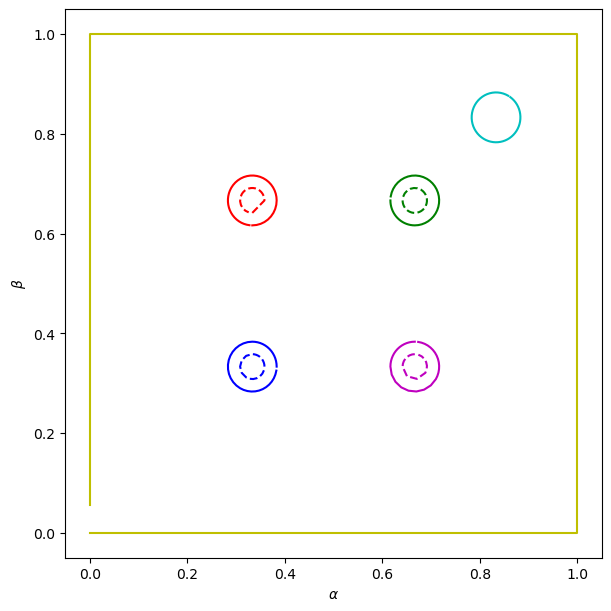

In [8]:
_, ax = plt.subplots(figsize=(6, 6), layout="constrained")
ax.plot(alpha_ripv_inner, beta_ripv_inner, "r-", label="RIPV inner")
ax.plot(alpha_ripv_outer, beta_ripv_outer, "r--", label="RIPV outer")
ax.plot(alpha_rspv_inner, beta_rspv_inner, "b-", label="RSPV inner")
ax.plot(alpha_rspv_outer, beta_rspv_outer, "b--", label="RSPV outer")
ax.plot(alpha_lipv_inner, beta_lipv_inner, "g-", label="LIPV inner")
ax.plot(alpha_lipv_outer, beta_lipv_outer, "g--", label="LIPV outer")
ax.plot(alpha_lspv_inner, beta_lspv_inner, "m-", label="LSPV inner")
ax.plot(alpha_lspv_outer, beta_lspv_outer, "m--", label="LSPV outer")
ax.plot(alpha_laa, beta_laa, "c-", label="LAA")
ax.plot(alpha_mv, beta_mv, "y-", label="MV")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")